# Homework 5
## Due Nov. 20

## 1. Principal Components Analysis (40 pts)

In class, we explored the concept of eigendigits, which were a more information-rich basis for representing the handwritten digits of the MNIST dataset (see course lecture notes 12).  In fact, a similar procedure can be performed for any standardized images dataset.  In this problem, we will find so-called *eigenfaces*, which are pretty much as they sound: the principal components of a face dataset.  The faces that we will use can be found in the so-called 'labelled faces in the wild' data set.  This can be downloaded via the scikit-learn module as follows:

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from sklearn.datasets import fetch_lfw_people

# Download labelled faces in the wild (only examples for which there are more than 50 examples)
lfw = fetch_lfw_people(min_faces_per_person=50, resize=0.7)

# Interrogate the data for the size of the images (h,w) 
m, h, w = lfw.images.shape

# For our purposes, as in MNIST, we will use a flattened version of the pixels
X = lfw.data
n = X.shape[1]

y = lfw.target

Since the second problem in this homework deals with classification, let's split the LFW data into a training and test dataset.

In [2]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 1.1
Using either your own implementation or the implementation given by scikit-learn, **perform a principal components analysis on the LFW data, retaining sufficient components to explain 95% of the total data variance (10pts).**  To prove that your PCA is successfully capturing this level of variability, **Generate a scree plot showing the cumulative explained variance as a function of number of principal components (10pts).**

Number of Components: 175
[0.20717777 0.3406332  0.4123834  0.46586186 0.51146305 0.5399574
 0.5626809  0.58224005 0.6008475  0.6187157  0.6339965  0.6476671
 0.6591539  0.6699882  0.68026346 0.6900818  0.69921297 0.7077748
 0.7160956  0.72367835 0.7307271  0.7373078  0.74331826 0.74903065
 0.7543325  0.75948524 0.7644132  0.7690593  0.77352816 0.77770317
 0.7816666  0.7854222  0.78896415 0.79242754 0.79583377 0.7991146
 0.80234134 0.8054803  0.80853075 0.8114497  0.814284   0.817062
 0.81978786 0.8224561  0.8250444  0.8275967  0.8300306  0.83241475
 0.8347897  0.83704644 0.8392757  0.8414056  0.84352034 0.8455806
 0.8475659  0.8495419  0.85143673 0.85331005 0.85514313 0.8569047
 0.8586223  0.86031777 0.8619951  0.8636352  0.86524767 0.8668344
 0.8683792  0.8698916  0.87138015 0.8728163  0.8742421  0.8756276
 0.8769862  0.8783417  0.87967336 0.880986   0.8822672  0.8835291
 0.88478297 0.8860111  0.8872294  0.8884221  0.88960475 0.890761
 0.8919103  0.89304566 0.8941536  0.89522696 0.89

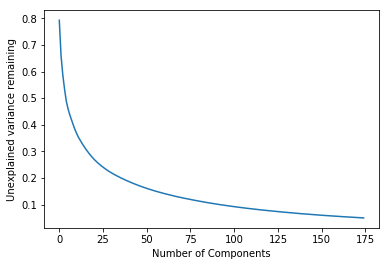

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Standardize
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)

#PCA (0.95) will stop when at least 95% of variance is retained
pca = PCA(0.95,copy=True,whiten=False)
pca.fit(X_train)

#Number components, and how much each component explains up to >= 95.00%
#print(pca.n_components)
print("Number of Components:",len(np.cumsum(pca.explained_variance_ratio_)))
print (np.cumsum(pca.explained_variance_ratio_))

#Scree plot code taken from lecture 12 notes
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(1-cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Unexplained variance remaining')
plt.show()

### 1.2
**Visualize the first five eigenfaces by reshaping the resulting principal components into images and plotting them (10pts).**

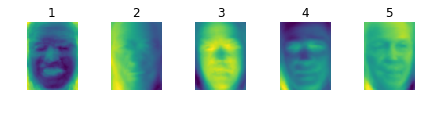

In [4]:
#Plotting first five Eigenfaces
fig,axs = plt.subplots(nrows=1,ncols=5)

for i,ax in np.ndenumerate(axs):
    ax.imshow(pca.components_[i,:].reshape((h,w)))
    ax.axis('off')
    ax.set_title(i[0]+1)

plt.tight_layout()

### 1.3 (Turn in the following question on Moodle)
(10pts) Consider the following two datasets (X_1 and X_2), each with three dimensions.  How many principal components do you expect each to have?  How do you know?

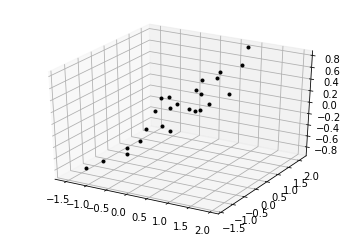

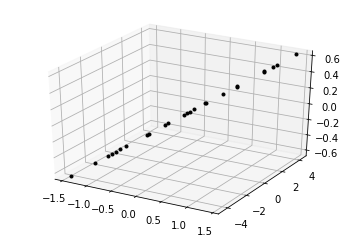

In [5]:
X_1 = np.array([[ 0.24658525,  0.846718  ,  0.29263623],
       [ 1.94365644, -0.78759333,  0.81430956],
       [ 0.54530612,  1.33540717,  0.53973449],
       [ 0.08287299,  1.41172682,  0.32378186],
       [ 1.16505735, -0.76913387,  0.4287019 ],
       [ 0.80324671, -0.3969266 ,  0.32223804],
       [ 0.30891776, -0.62816207,  0.02882647],
       [ 0.68643482,  0.95395446,  0.5340083 ],
       [-1.1862806 ,  1.80433744, -0.23227281],
       [ 1.31814933, -0.86135592,  0.48680348],
       [-0.01355747,  0.52411544,  0.09804436],
       [-0.94016758, -1.00530368, -0.67114452],
       [-1.53088917, -0.79227508, -0.9238996 ],
       [ 0.87683622, -1.29639414,  0.17913928],
       [-0.34180964, -0.21053314, -0.21301145],
       [-0.40673884, -0.89787012, -0.38294344],
       [-0.74792211,  1.42602549, -0.08875596],
       [-0.10994822, -1.34930993, -0.3248361 ],
       [-0.09104714, -0.87550541, -0.22062465],
       [-0.18231387,  0.51312677,  0.01146842],
       [ 1.48119305, -0.77899653,  0.58479722],
       [ 0.67944609,  0.31732884,  0.40318881],
       [ 0.8137745 ,  2.09032765,  0.82495278],
       [-0.81678612,  0.9302194 , -0.22234918],
       [ 1.32824051,  0.88054246,  0.84022875]])

X_2 = np.array([[ 9.97897650e-01,  2.99369295e+00,  4.49053943e-01],
       [-9.19396971e-01, -2.75819091e+00, -4.13728637e-01],
       [ 2.63408733e-01,  7.90226199e-01,  1.18533930e-01],
       [ 1.23229118e-01,  3.69687353e-01,  5.54531030e-02],
       [ 1.00365433e+00,  3.01096300e+00,  4.51644450e-01],
       [-9.73346396e-01, -2.92003919e+00, -4.38005878e-01],
       [-2.48058203e-01, -7.44174610e-01, -1.11626192e-01],
       [-1.14257767e+00, -3.42773300e+00, -5.14159949e-01],
       [-4.51139403e-01, -1.35341821e+00, -2.03012732e-01],
       [-2.01440713e-01, -6.04322138e-01, -9.06483206e-02],
       [ 1.15492027e+00,  3.46476081e+00,  5.19714121e-01],
       [ 6.86908285e-02,  2.06072486e-01,  3.09108728e-02],
       [-4.73749885e-01, -1.42124965e+00, -2.13187448e-01],
       [ 1.11404171e+00,  3.34212513e+00,  5.01318770e-01],
       [-8.13230322e-01, -2.43969096e+00, -3.65953645e-01],
       [-8.70193912e-01, -2.61058174e+00, -3.91587261e-01],
       [ 6.55592608e-01,  1.96677783e+00,  2.95016674e-01],
       [ 2.88671096e-02,  8.66013288e-02,  1.29901993e-02],
       [ 6.64698327e-01,  1.99409498e+00,  2.99114247e-01],
       [ 4.83556414e-01,  1.45066924e+00,  2.17600386e-01],
       [ 2.74450530e-01,  8.23351591e-01,  1.23502739e-01],
       [-2.38147337e-03, -7.14442010e-03, -1.07166302e-03],
       [ 1.39721186e+00,  4.19163557e+00,  6.28745336e-01],
       [-1.44265778e+00, -4.32797333e+00, -6.49196000e-01],
       [-7.39010087e-01, -2.21703026e+00, -3.32554539e-01]])

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(*X_1.T,'k.')

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(*X_2.T,'k.')

## 2. Logistic (actually Softmax) Regression (30pts)

To explore the use of logistic regression, we will again use labelled faces in the wild.  For this problem, fit the PCA-transformed training data using a logistic regression model.  To begin with you'll need to transform both the test and training datasets into the PCA basis.

In [6]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Now that we have our transformed features, we can implement logistic regression.  Rather than come up with our own, let's use the sklearn implementation, which is quite good:

In [7]:
from sklearn.linear_model import LogisticRegression

### 2.1
Before you begin, there are a few keyword arguments that you will want to provide to this function.  First, you'll want to give it the command multi_class='multinomial'.  This causes the classifier to perform true softmax regression, rather than a strange n-fold 1-vs-many binary logistic regression scheme.  Second, you should set the keyword argument to solver='lbfgs'.  **Fit a logistic regression model to your training data** 

In [8]:
logistic_regression = LogisticRegression(multi_class='multinomial', solver='lbfgs')

### 2.2
**After fitting your model, classify the test set, and print a confusion matrix and the overall accuracy**

In [9]:
from sklearn.metrics import confusion_matrix

#Fit LR model
logistic_regression.fit(X_train_pca, y_train)

#predict for test dataset
prediction = logistic_regression.predict(X_test_pca)

#Printing and accuracy
my_confusion_matrix = confusion_matrix(y_test, prediction)
accuracy = np.diagonal(my_confusion_matrix).sum()/my_confusion_matrix.sum()
print(my_confusion_matrix)
print("Accuracy:" + "{:.2%}".format(accuracy))

[[ 16   3   1   2   1   0   0   1   0   1   0   0]
 [  3  63   2   3   1   1   1   0   2   0   1   0]
 [  1   4  23   6   2   0   1   2   0   0   3   0]
 [  1   7   1 153   4   3   2   1   1   1   2   4]
 [  0   0   0   4  24   1   0   0   1   0   0   3]
 [  0   1   0   4   0  18   1   0   0   0   0   2]
 [  0   0   1   1   1   0   9   1   0   0   0   0]
 [  2   0   2   0   0   0   0  13   0   0   0   0]
 [  0   2   0   0   0   0   0   0  10   0   0   3]
 [  0   1   0   0   1   0   1   0   0  14   0   0]
 [  0   5   0   1   0   1   0   0   0   0  12   0]
 [  0   3   1   3   3   0   5   0   0   0   0  36]]
Accuracy:75.92%


### 2.3
By default, sklearn applies regularization to this problem, penalizing large parameter values.  You can control the degree of regularization by using the C=1e-4 keyword argument (or C=1e-6 or whatever).  However, it is not always clear what the best regularization should be.  To deal with this problem, sklearn offers the function LogisticRegressionCV, which automatically runs [k-fold cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation) on a user-specified range of regularization parameters, and selects the one which minimizes the classification error.  Otherwise, it works just like LogisticRegression.  ***Use this function to determine the optimal value of the regularization parameter C, and report your classification accuracy with this new value.  Does regularization appreciably improve your classification accuracy? *** 

*HINT 1: A good range to check over is from $C=1$ to $C=10^{-11}$.  You'll want the regularization values that you test to be distributed logarithmically, e.g. via the numpy logspace command.*  

In [10]:
from sklearn.linear_model import LogisticRegressionCV

Cs = np.logspace(1, -11, num = 100)
logistic_regression_CV = LogisticRegressionCV(multi_class='multinomial', solver='lbfgs', Cs=Cs)
logistic_regression_CV.fit(X_train_pca, y_train)

prediction = logistic_regression_CV.predict(X_test_pca)

my_new_confusion_matrix = confusion_matrix(y_test, prediction)
new_accuracy = np.diagonal(my_new_confusion_matrix).sum()/my_new_confusion_matrix.sum()
print(logistic_regression_CV.C_)
#print(logistic_regression_CV.scores_)
#print(logistic_regression_CV.n_iter_)
print(my_new_confusion_matrix)
print("Accuracy:" + "{:.2%}".format(new_accuracy))

[6.57933225e-06 6.57933225e-06 6.57933225e-06 6.57933225e-06
 6.57933225e-06 6.57933225e-06 6.57933225e-06 6.57933225e-06
 6.57933225e-06 6.57933225e-06 6.57933225e-06 6.57933225e-06]
[[ 18   2   0   4   1   0   0   0   0   0   0   0]
 [  2  67   1   4   0   1   0   0   1   0   0   1]
 [  1   2  27   5   3   1   0   1   1   0   0   1]
 [  1   7   1 164   3   0   1   1   0   0   1   1]
 [  0   0   0   5  25   0   0   1   0   0   0   2]
 [  0   1   0   4   1  18   1   0   0   0   0   1]
 [  0   0   0   1   0   0  10   0   0   0   1   1]
 [  2   0   2   0   0   0   0  12   0   0   0   1]
 [  0   2   0   0   0   0   0   0  11   0   0   2]
 [  0   1   0   0   1   0   1   0   0  14   0   0]
 [  0   4   0   1   0   1   0   0   0   0  13   0]
 [  0   2   1   4   1   0   5   0   0   0   0  38]]
Accuracy:80.97%


## 3. This time in color (20 pts)(GRAD STUDENTS ONLY)

In the above two problems, we ignored one of the feature dimensions: color.  In fact, every element of the LFW dataset is a color image (previously we averaged the bands).  Rerun the above process of performing a PCA and classifying via logistic regression, but this time import the data using

In [304]:
# Download labelled faces in the wild (only examples for which there are more than 50 examples)
lfw = fetch_lfw_people(min_faces_per_person=50, resize=0.7, color=True)

You will have to modify your code to account for data with different dimensions.  You will also have to think a bit about how to display principal component arrays, since when displaying a 3-band image matplotlib will expect 8 bit integer arrays.  **Can you achieve better classification accuracy using the color dataset?**